In [1]:
!pip install segmentation-models

In [ ]:
import tensorflow as tf

print(tf.__version__)

In [3]:
import sys
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import segmentation_models as sm
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

Segmentation Models: using `keras` framework.


In [173]:
# Get test set
test_original_2D = np.load('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/cv9/2D_test_original9.npy')
test_mask_2D = np.load('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/cv9/2D_test_mask9.npy')

In [174]:
test_mask_2D.shape

(64, 512, 512, 2)

In [175]:
# Prediction DICE
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)

    dice = (2.0 * intersection) / (union + 1e-8)
    return dice

In [176]:
# Normalization for original 3D unet model
test_original_ori = test_original_2D/255

In [177]:
# get model
model_ori = load_model('/Users/yichunsun/Desktop/TFM/Data/2D/2D_models/withcv/vanilla_2D_cv9.h5', compile=False)

In [178]:
ori_prediction = model_ori.predict(test_original_ori[:,:,:,0])

In [179]:
binary_ori = (ori_prediction > 0.5).astype(int)

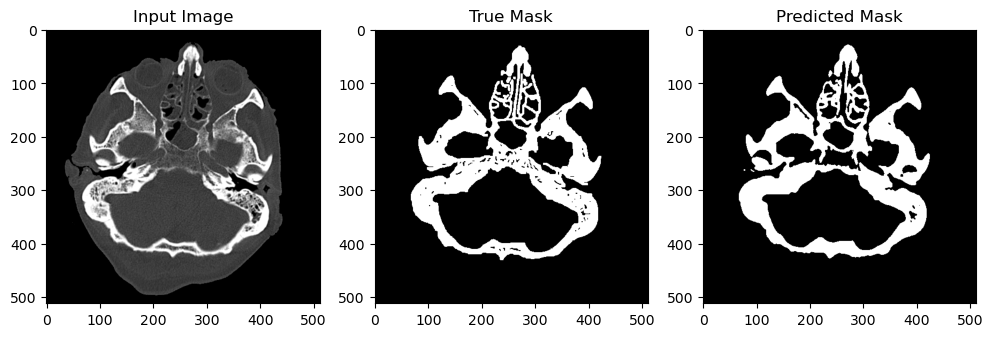

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(test_original_2D[45,:,:,0], cmap='gray')
axes[0].set_title('Input Image')

axes[1].imshow(test_mask_2D[45,:,:,0], cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(binary_ori[45,:,:,0], cmap='gray')
axes[2].set_title('Predicted Mask')
    
plt.show()

In [180]:
D_ori = dice_coefficient(test_mask_2D[:,:,:,0], binary_ori[:,:,:,0])
print("DICE of using the original structure of Unet 2D:", D_ori)

DICE of using the original structure of Unet 2D: 0.8695512427702409


In [56]:
for sample_idx in range(70):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(test_original_2D[sample_idx,:,:,0], cmap='gray')
    axes[0].set_title('Input Image')

    axes[1].imshow(test_mask_2D[sample_idx,:,:,0], cmap='gray')
    axes[1].set_title('True Mask')

    axes[2].imshow(binary_ori[sample_idx,:,:,0], cmap='gray')
    axes[2].set_title('Predicted Mask')

    save_dir = '/Users/yichunsun/Desktop/TFM/Data/2D/Results/PredictResult/vanilla'
    os.makedirs(save_dir, exist_ok=True)

    plt.savefig(os.path.join(save_dir, f'Test_Unet3D_slice_{sample_idx}.png'))
    plt.close()

In [181]:
# Normalization for unet with resnet50 encoder model
preprocess_resn = sm.get_preprocessing('resnet50')
test_original_resn = preprocess_resn(test_original_2D)

In [182]:
model_resn = load_model('/Users/yichunsun/Desktop/TFM/Data/2D/2D_models/withcv/resnet50_2D_cv9.h5', compile=False)

In [183]:
resn_prediction = model_resn.predict(test_original_resn)

In [184]:
binary_resn = (resn_prediction > 0.5).astype(int)

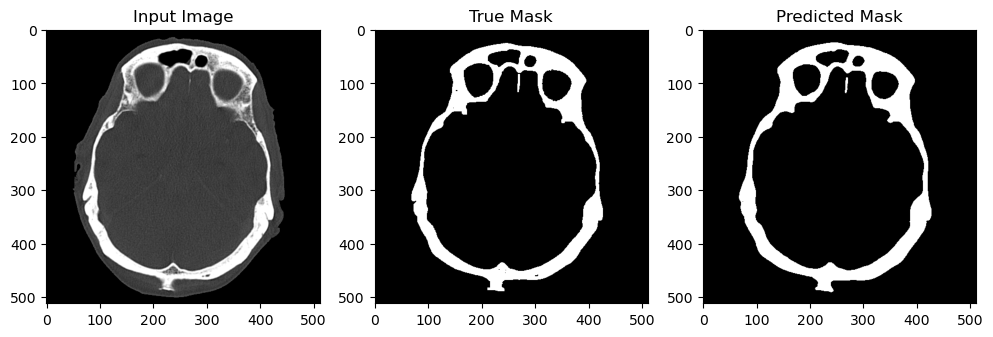

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(test_original_2D[67,:,:,0], cmap='gray')
axes[0].set_title('Input Image')

axes[1].imshow(test_mask_2D[67,:,:,0], cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(binary_resn[67,:,:,0], cmap='gray')
axes[2].set_title('Predicted Mask')
    
plt.show()

In [27]:
for sample_idx in range(70):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(test_original_2D[sample_idx,:,:,0], cmap='gray')
    axes[0].set_title('Input Image')

    axes[1].imshow(test_mask_2D[sample_idx,:,:,0], cmap='gray')
    axes[1].set_title('True Mask')

    axes[2].imshow(binary_resn[sample_idx,:,:,0], cmap='gray')
    axes[2].set_title('Predicted Mask')

    save_dir = '/Users/yichunsun/Desktop/TFM/Data/2D/Results/PredictResult/resnet50'
    os.makedirs(save_dir, exist_ok=True)

    plt.savefig(os.path.join(save_dir, f'Test_encoder_resnet50_slice_{sample_idx}.png'))
    plt.close()

In [185]:
D_resn = dice_coefficient(test_mask_2D[:,:,:,0], binary_resn[:,:,:,0])
print("DICE of using the resnet50 as encoder:", D_resn)

DICE of using the resnet50 as encoder: 0.8940316181872937


In [186]:
# Normalization for unet with vgg16 encoder model
preprocess_vgg = sm.get_preprocessing('vgg16')
test_original_vgg = preprocess_vgg(test_original_2D)

In [187]:
model_vgg = load_model('/Users/yichunsun/Desktop/TFM/Data/2D/2D_models/withcv/vgg16_2D_cv9.h5', compile=False)

In [188]:
vgg_prediction = model_vgg.predict(test_original_vgg)

In [189]:
binary_vgg = (vgg_prediction > 0.5).astype(int)

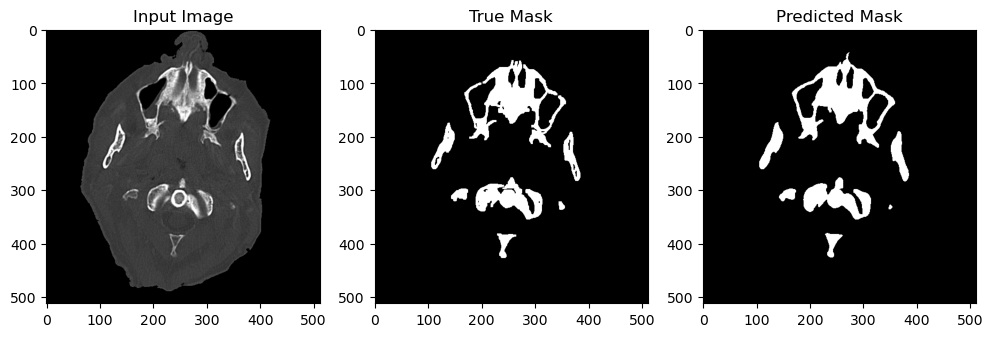

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(test_original_2D[5,:,:,0], cmap='gray')
axes[0].set_title('Input Image')

axes[1].imshow(test_mask_2D[5,:,:,0], cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(binary_vgg[5,:,:,0], cmap='gray')
axes[2].set_title('Predicted Mask')
    
plt.show()

In [35]:
for sample_idx in range(70):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(test_original_2D[sample_idx,:,:,0], cmap='gray')
    axes[0].set_title('Input Image')

    axes[1].imshow(test_mask_2D[sample_idx,:,:,0], cmap='gray')
    axes[1].set_title('True Mask')

    axes[2].imshow(binary_vgg[sample_idx,:,:,0], cmap='gray')
    axes[2].set_title('Predicted Mask')

    save_dir = '/Users/yichunsun/Desktop/TFM/Data/2D/Results/PredictResult/vgg16' 
    os.makedirs(save_dir, exist_ok=True)

    plt.savefig(os.path.join(save_dir, f'Test_encoder_vgg16_slice_{sample_idx}.png'))
    plt.close()

In [190]:
D_vgg = dice_coefficient(test_mask_2D[:,:,:,0], binary_vgg[:,:,:,0])
print("DICE of using the vgg16 as encoder:", D_vgg)

DICE of using the vgg16 as encoder: 0.9079399149059885
